<a href="https://colab.research.google.com/github/Javad1942/img_clasification-/blob/main/imgclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from tensorflow import keras
from keras.constraints import max_norm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt

## loading datas

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Data structure review

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[0]

array([6], dtype=uint8)

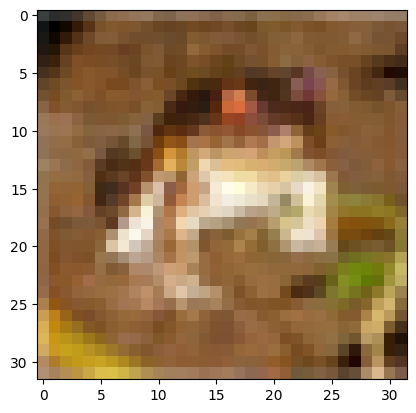

In [ ]:
plt.imshow(X_train[0])

## Normalize the Inputs from 0-255 to between 0 and 1 by dividing by 255

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

## One-hot encode outputs

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
num_class = y_test.shape[1] #10

In [ ]:
X_train.shape

(50000, 32, 32, 3)

## building model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │              

 Total params: 393,962 (1.50 MB)

 Trainable params: 393,322 (1.50 MB)

 Non-trainable params: 640 (2.50 KB)

## Training the Model

In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=40 , batch_size=64)

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.3762 - loss: 1.7723 - val_accuracy: 0.5649 - val_loss: 1.2053
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6065 - loss: 1.1158 - val_accuracy: 0.6734 - val_loss: 0.9424
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6745 - loss: 0.9235 - val_accuracy: 0.7081 - val_loss: 0.8253
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7121 - loss: 0.8313 - val_accuracy: 0.6888 - val_loss: 0.9243
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7319 - loss: 0.7694 - val_accuracy: 0.7328 - val_loss: 0.7737
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7577 - loss: 0.7063 - val_accuracy: 0.7443 - val_loss: 0.7254
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7662 - loss: 0.6675 - val_accuracy: 0.7252 - val_loss: 0.7942
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7803 - loss: 0.6314 - val_accura

In [ ]:
for key,val in history.history.items() :
  print(key)

accuracy
loss
val_accuracy
val_loss


In [ ]:
import pandas as pd

<Axes: >

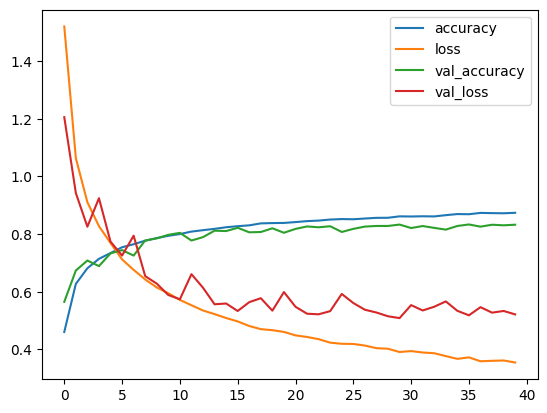

In [ ]:
pd.DataFrame(history.history).plot()

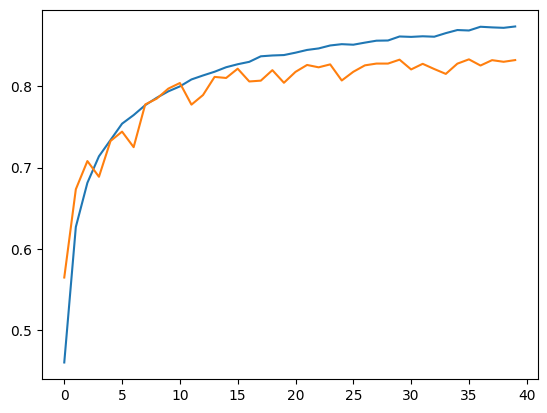

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
model.save('CNN_cifar10.keras')

In [ ]:
model2 = load_model('CNN_cifar10.keras')

In [ ]:
labels = ['airplan', 'automobile', 'bird','cat','deer', 'dog', ' frog', 'horse','ship', 'truck']

In [ ]:
import numpy as np
import seaborn as sns ; sns.set()

In [ ]:
np.argmax(model2.predict(X_test[0:10])[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


3

In [ ]:
labels[3]

'cat'

In [ ]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis =1)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

## creating Confusion Matrix

In [ ]:
y_test =np.argmax(y_test, axis=1)

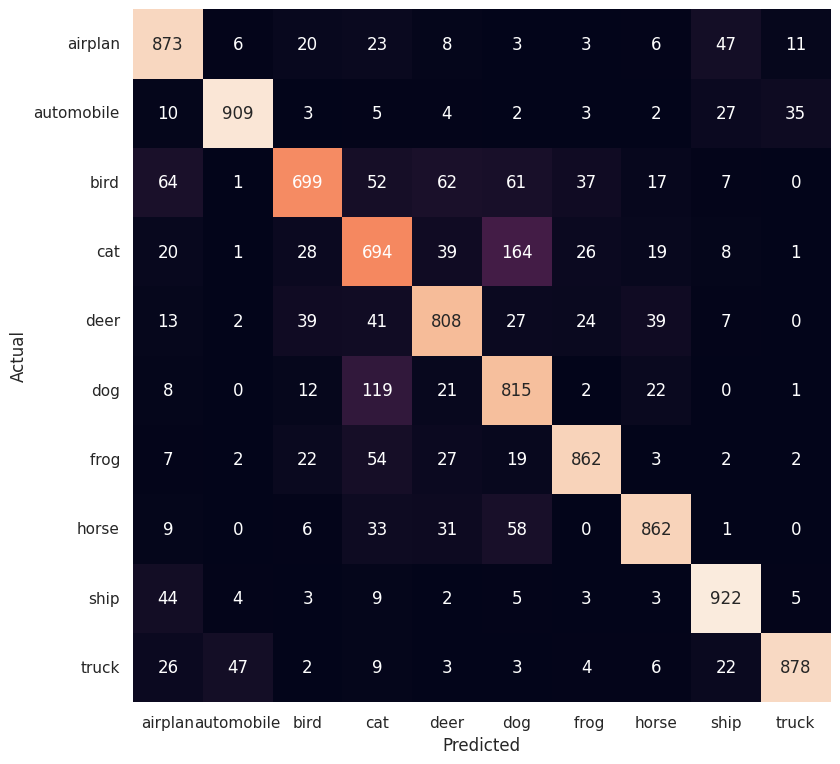

In [ ]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False ,xticklabels=labels, yticklabels=labels, fmt='d', annot=True )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

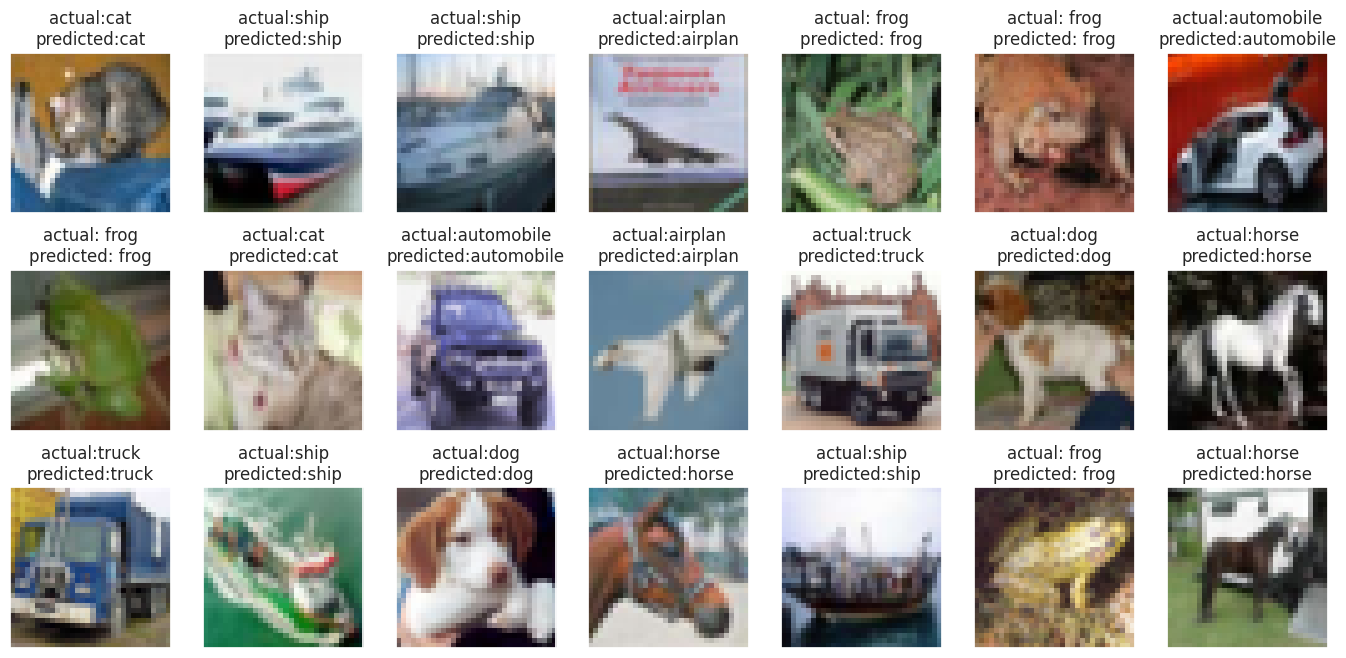

In [ ]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False, sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i, j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i, j].imshow(X_test[index], cmap='gray')
        axes[i, j].get_xaxis().set_visible(False)
        axes[i, j].get_yaxis().set_visible(False)
        index += 1

plt.show()
